In [7]:
! jt -r

Reset css and font defaults in:
C:\Users\nurta\.jupyter\custom &
C:\Users\nurta\AppData\Roaming\jupyter\nbextensions


## Lets try to make it all a bit less abstract

#### What is plt.show()?

.show() is basically a chain of functions defined in matplotlib.pyplot
which is a few thousands line of code with many functions written by other people so we don't have to. (line 376)

`def show(*args, **kwargs):
    _warn_if_gui_out_of_main_thread()
    return _get_backend_mod().show(*args, **kwargs)`

These 2 other functions used in .show() function are also defined in the same file at different lines of code in matplotlib.pyplot along with other libraries, methods... The documation is quiet complex and I wouldn't go further than just to see where these methods are coming from, to try to make it all a bit less abstract. 

`_warn_if_gui_out_of_main_thread() 
 _get_backend_mod()`

Here is the link if you want to have a look.

https://github.com/matplotlib/matplotlib/blob/dc0328fb9c1c8817b07a5121a106a06be3571433/lib/matplotlib/pyplot.py#L334

Sci-kit library works in a similar way. 
Let s give an example and find where the ridge_regression is defined for example

https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/linear_model/_ridge.py#L375

### So the code is written by other people so we don't need to spend time on that. We don't need to know how to build a car, we just need to learn how to drive!

#### So how do we drive the car?

## Steps
- Explore/know your data
- Prepare data (clean, manipulate)
- Train model (supervised, unsupervised)
- Test model (test on known data)

Cleaning data and exploring and knowing your data to be able to decide which futures you can use for which models(classification/regression) is the difficult part if you ask me.

After that most models use a similar approach to test our model with the known data.



- import what you need and what you want to use

`from sklearn.model_selection import train_test_split
from sklearn.placeholder import the_model_you_want_to_use
from sklearn.neighbors import KNeighborsClassifier (example)` 


- Assign the features and the target

`X = all features you want to use except the target
y = only the target`

- split your test/train data to be able to train and test it, which by default uses 80% as train 20% as test

`X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)`

- assign your model to a variable, 
- after this you will be able to use methods available by that model like fit(), predict(), score(), accuracy_score()

`example = KNeighborsClassifier()`

- fit your model to 80% train data (feeding the model with known 80% data)

`example.fit(X_train, y_train)` 

- can predict based on your X features on the 20% test data (X_test) and assign to a variable to check score later

`prediction = example.predict(X_test)`

- which you can use to check the actual score on the known target 20% test data (y_test)

`score = accuracy_score(y_test, prediction)`

You can also print out your y_test and prediction to compare the results yourself.

`Attention! So far we didn't really predict anything new yet, we just predicted the known values to test our model`

## Classification

##### K-Nearest Neighbors

Basically predicts the new target point based on nearest neighbors. if n_neighbors is set to 1 it just picks closest target.

Changing n_neighbors value also changes the prediction, which depends on how the data is spread.

Simply, the prediction of our unknown target is made by n amount closest neighbors.



#### Please ignore the code and look at the plot.

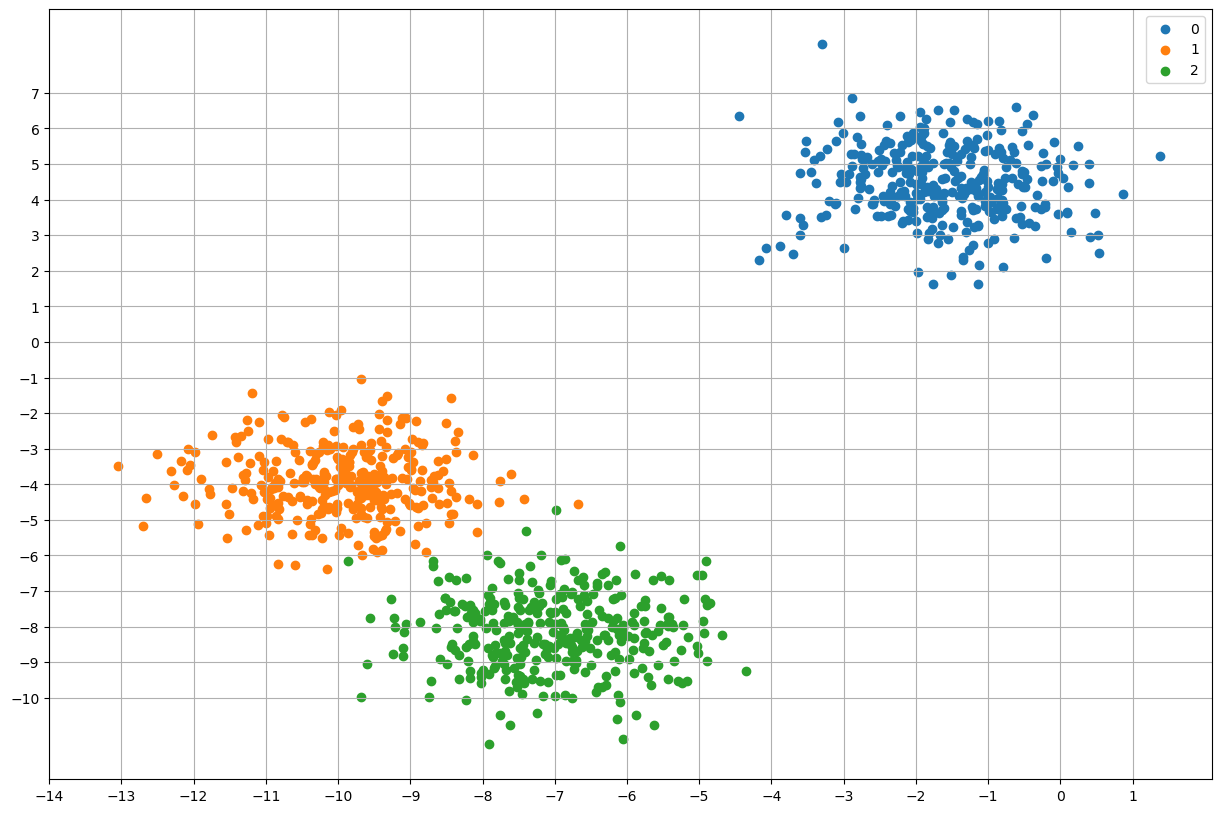

In [1]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

X, y = make_blobs(n_samples=1000, centers=3, random_state=1)

fig, ax = plt.subplots()

counter = Counter(y)
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))

plt.legend()
fig.set_size_inches(15, 10)

plt.xticks(list(range(-14,2)))
plt.yticks(list(range(-10,8)))
plt.grid()
plt.show()

`Example_1  =` let s say our new point is at (-7,-4) with 1 neighbor closest point and the prediction would be green but with 3 neighboors closest 3 points would be green, orange , orange and the prediction would be orange.

`Example_2 =`  for the new point (-3,3) with 1 ,3, 5 even 15 n_neighbors closest neighbors and the prediction would be blue.

We can decide the best n_neighbors value with some tests to see if the predictions are `good` for that n amount.

We can apply grid search, which basically gets a dictionary of values as n_neighbors values to check which one is giving best results.

We can also start our own for loop in a list of numbers we want to test as our n_neighbors to plot the results to decide or just print the predicted value VS actual value with that amount neighbors.

### LINEAR REGRESSION 

`Bias:`
Biases are the underlying assumptions that are made by data to simplify the target function. Bias does help us generalize the data better and make the model less sensitive to single data points. It also decreases the training time because of the decrease in complexity of target function High bias suggest that there is more assumption taken on target function. This leads to the underfitting of the model sometimes.
Examples of High bias Algorithms include Linear Regression, Logistic Regression etc.

`Variance:`
In machine learning, Variance is a type of error that occurs due to a model’s sensitivity to small fluctuations in the dataset. The high variance would cause an algorithm to model the outliers/noise in the training set. This is most commonly referred to as overfitting. In this situation, the model basically learns every data point and does not offer good prediction when it tested on a novel dataset.
Examples of High variance Algorithms include Decision Tree, KNN etc.

`source =` "https://www.geeksforgeeks.org/lasso-vs-ridge-vs-elastic-net-ml/"

### Alpha explained ( Example image ridge regression) 

So, if the alpha value is 0, it means that it is just an Ordinary Regression model. So, the larger is the alpha, the higher is the smoothness constraint. So, the smaller the value of alpha, the higher would be the magnitude of the coefficients.

So, the alpha parameter need not be small in this example. But, for a larger alpha, the flexibility of the fit would be very strict.

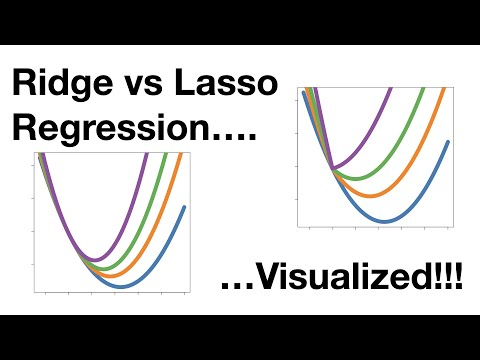

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Xm2C_gTAl8c", width=800, height=500)

In [4]:
from IPython.display import Image
Image(url= "https://i.stack.imgur.com/YpdPE.png")

##### So when using Ridge regression, alpha has to be used wisely. Cross-validation is a good way of doing this. Basically the value of alpha is iterated over a range of values and the one giving higher CV score is chosen.

- Ridge: It is majorly used to prevent overfitting. Since it includes all the features, it is not very useful in case of exorbitantly high #features, say in millions, as it will pose computational challenges.

### Lasso Regression
- LASSO = Least Absolute Shrinkage and Selection Operator

Lasso: Since it provides sparse solutions, it is generally the model of choice (or some variant of this concept) for modelling cases where the #features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.

`Limitation of Lasso Regression:`
Lasso sometimes struggles with some types of data. If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant (or may be used in the test set).
If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data

#### Note
Along with Ridge and Lasso, Elastic Net is another useful technique. It can be used to balance out the pros and cons of ridge and lasso regression.

`Elastic Net :`
Sometimes, the lasso regression can cause a small bias in the model where the prediction is too dependent upon a particular variable. In these cases, elastic Net is proved to better it combines the regularization of both lasso and Ridge. The advantage of that it does not easily eliminate the high collinearity coefficient.

### Lets see it with an example, ignore the code and skip to `Linear and Ridge Regression Models`

code can be found at 
https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression

this is where the data like boston data is coming from
https://github.com/scikit-learn/scikit-learn/tree/main/sklearn/datasets/data

C:\Users\nurta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

<AxesSubplot:>

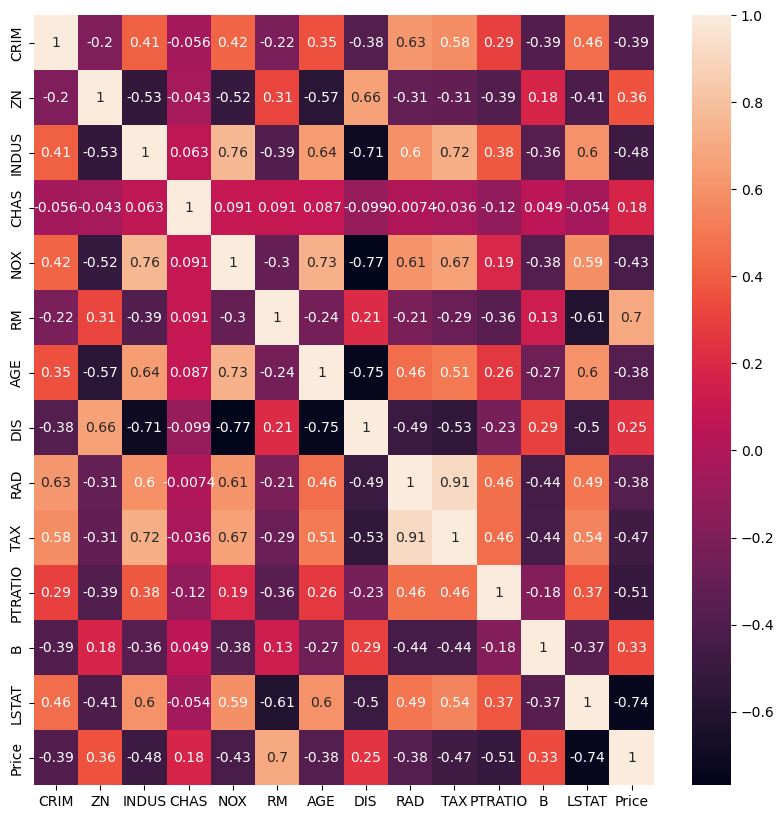

In [2]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

#data
boston = load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#target variable
boston_df['Price']=boston.target
#preview
boston_df.head()

#Exploration
plt.figure(figsize = (10, 10))
sns.heatmap(boston_df.corr(), annot = True)

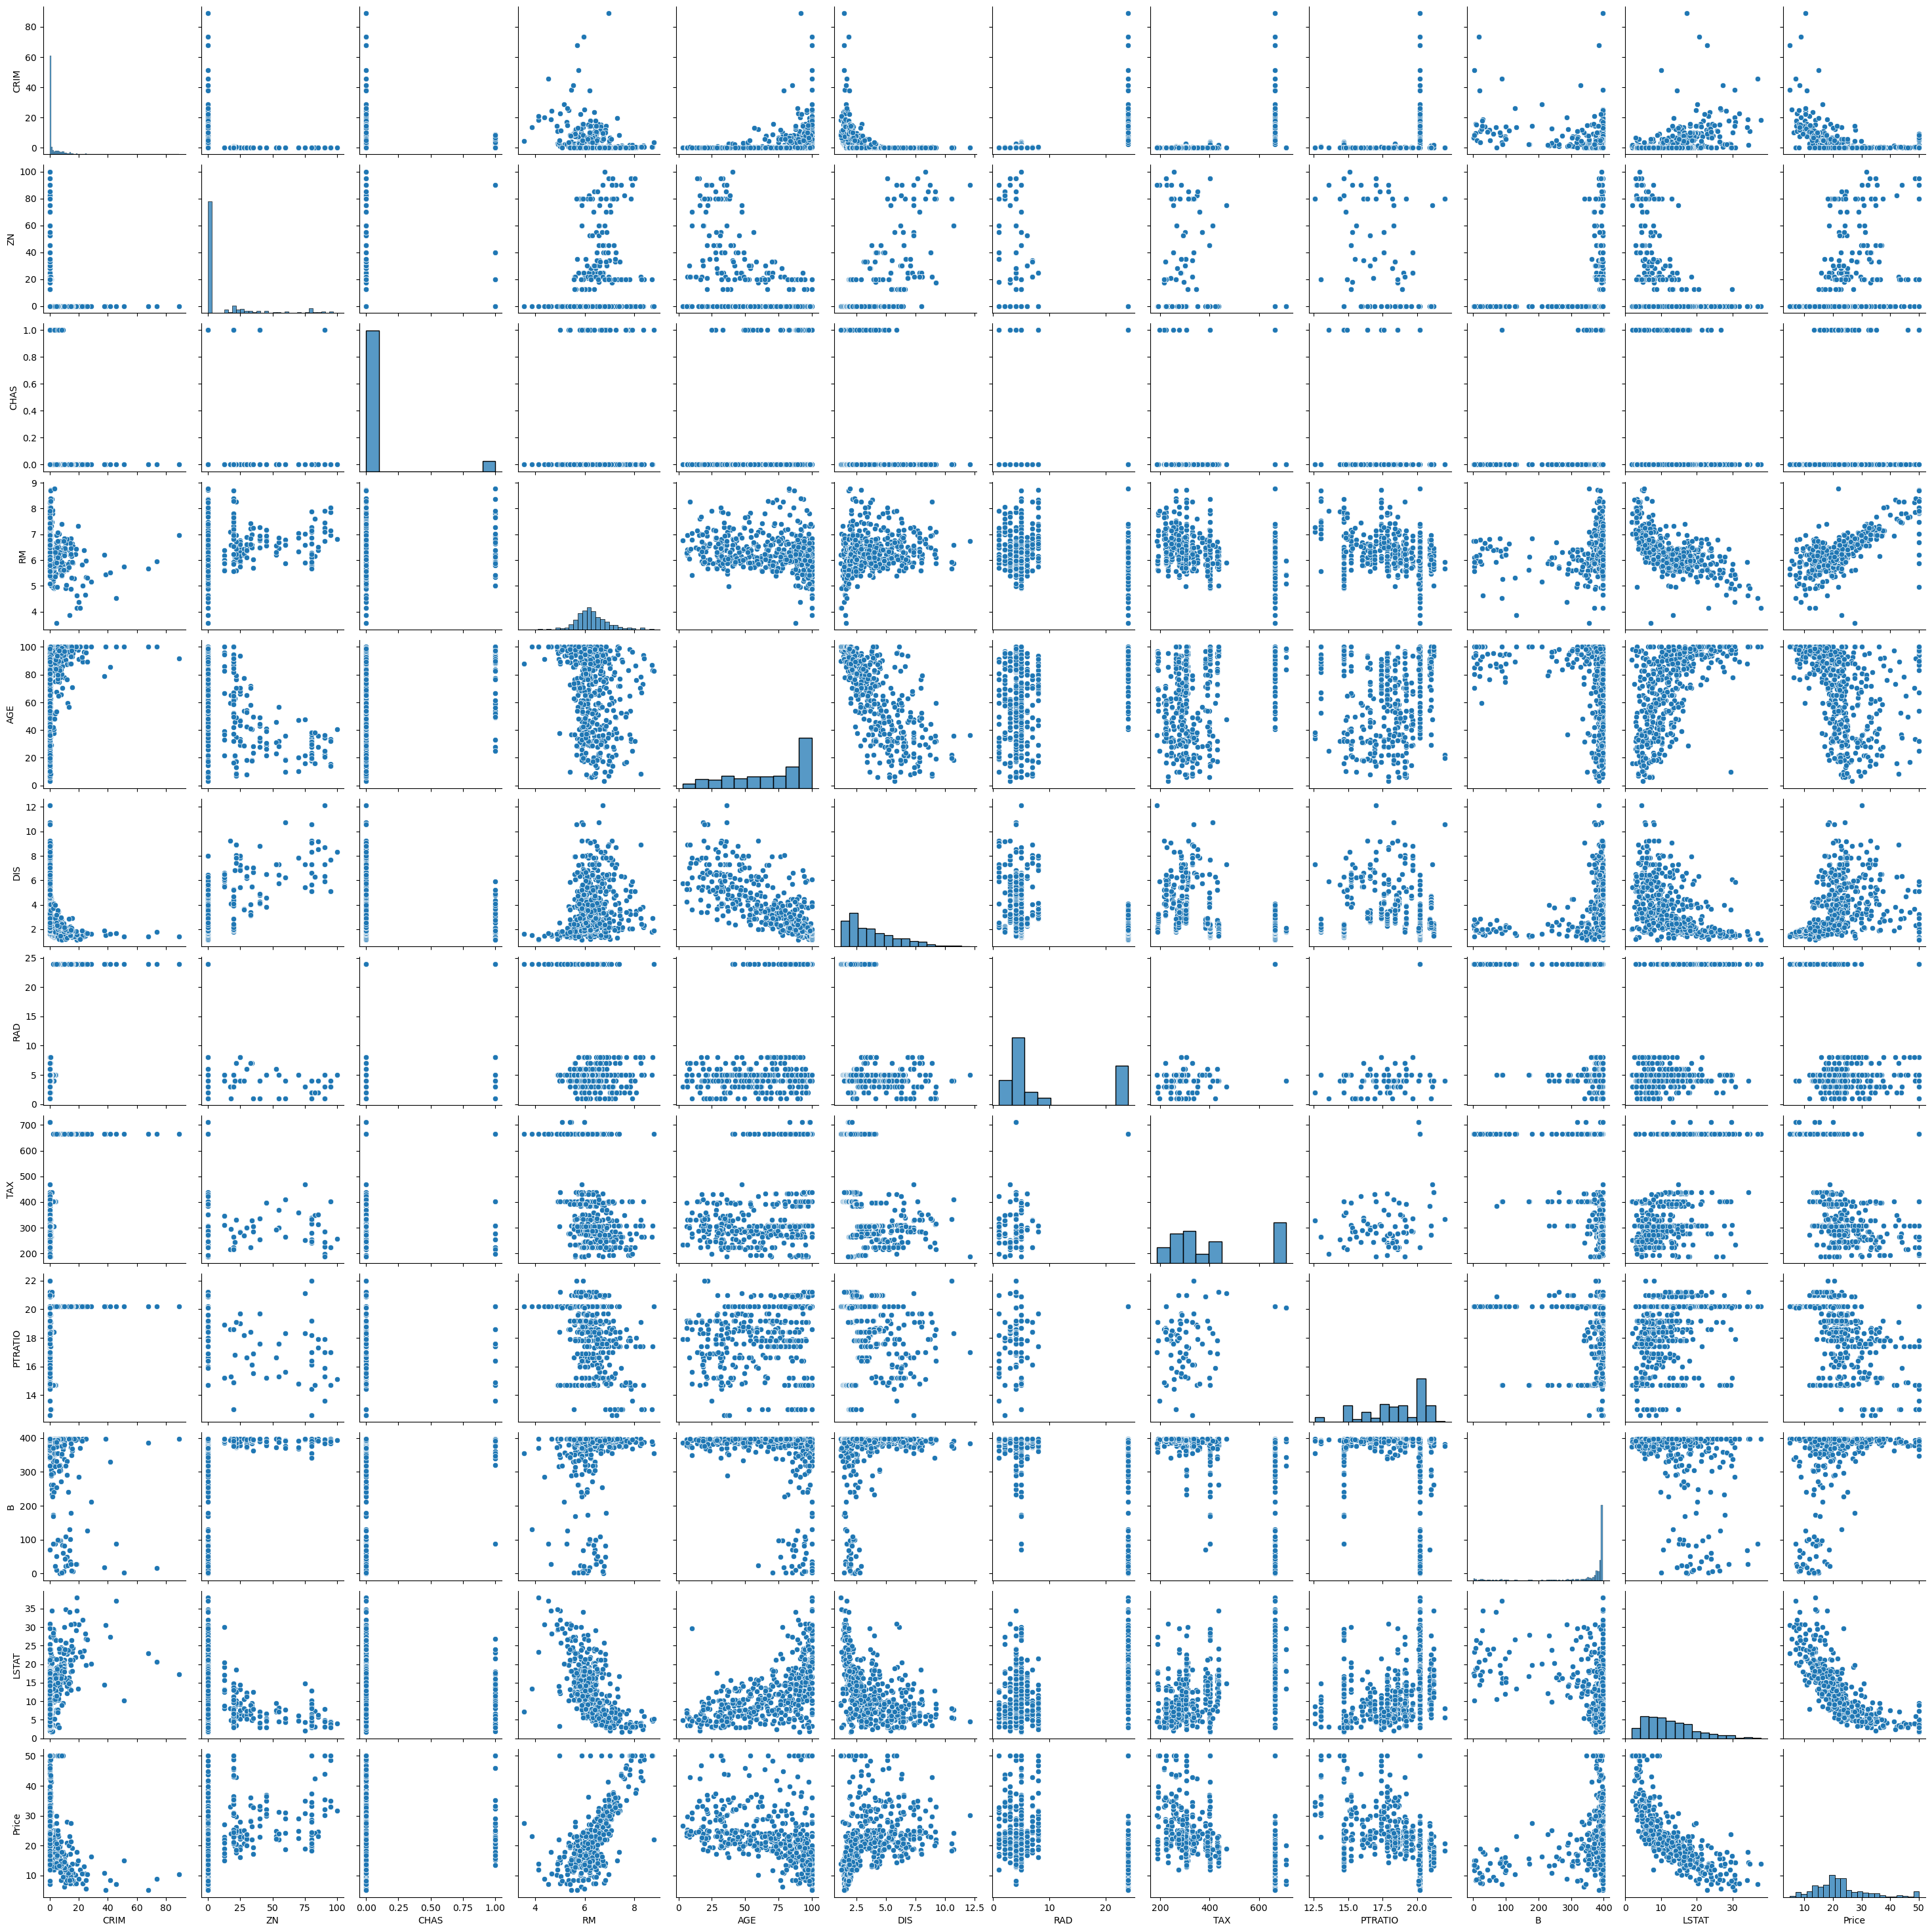

In [3]:
#There are cases of multicolinearity, we will drop a few columns
boston_df.drop(columns = ["INDUS", "NOX"], inplace = True)

#pairplot
sns.pairplot(boston_df)

#we will log the LSTAT Column
boston_df.LSTAT = np.log(boston_df.LSTAT)

In [4]:
#preview
features = boston_df.columns[0:11]
target = boston_df.columns[-1]

#X and y values
X = boston_df[features].values
y = boston_df[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dimension of X_train is (354, 11)
The dimension of X_test is (152, 11)


### Linear and Ridge Regression Models

In [5]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
#prediction = lr.predict(X_test)

#actual target
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

The train score for lr model is 0.7859187129718976
The test score for lr model is 0.7672379770848983

Ridge Model............................................

The train score for ridge model is 0.7844233397895741
The test score for ridge model is 0.7696722158755337


Using an alpha value of 10, the evaluation of the model, the train, and test data indicate better performance on the ridge model than on the linear regression model.

We can also plot the coefficients for both the linear and ridge models.

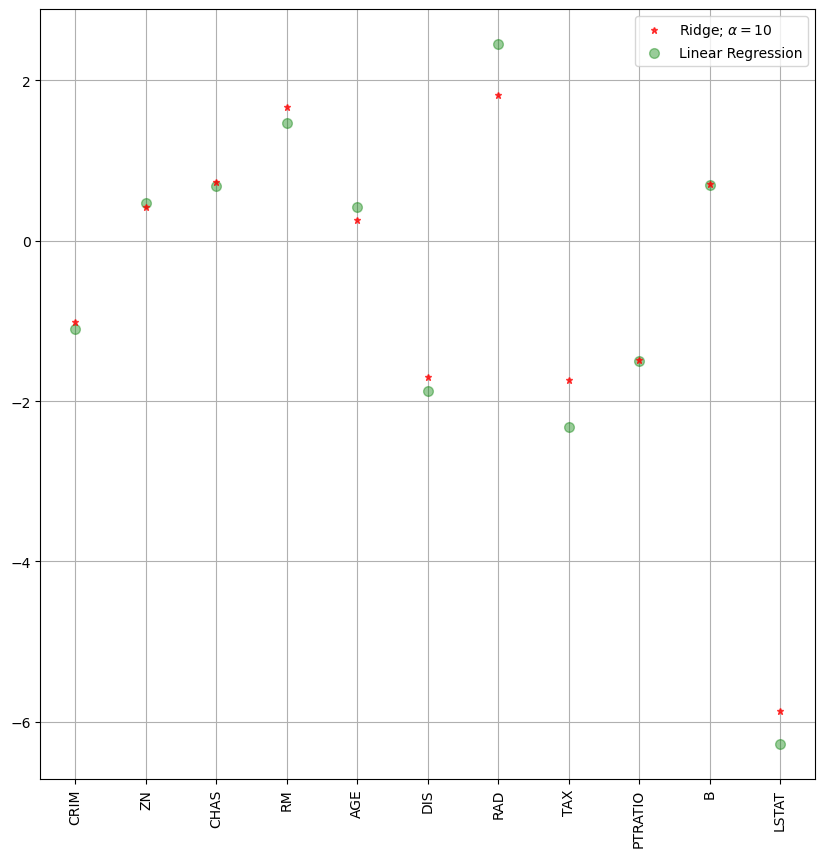

In [6]:
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

# plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

plt.xticks(rotation = 90)
plt.legend()
plt.grid()
plt.show()

### Selecting Optimal Alpha Values Using Cross-Validation for RIDGE

In [7]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Ridge Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

#score
print("\nRidge Model\n")
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))


Ridge Model

The train score for ridge model is 0.7858973065951265
The train score for ridge model is 0.7676510554851081


## Lasso Regression

In [9]:
#Lasso regression model
print("\nLasso Model\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model

The train score for ls model is 0.0
The test score for ls model is -0.0030704836212473996


### Selecting Optimal Alpha Values Using Cross-Validation for LASSO

In [10]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)

#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.7859187081843189
0.7672374265750733


### Final comparison Ridge, Lasso, Linear Regression(s)

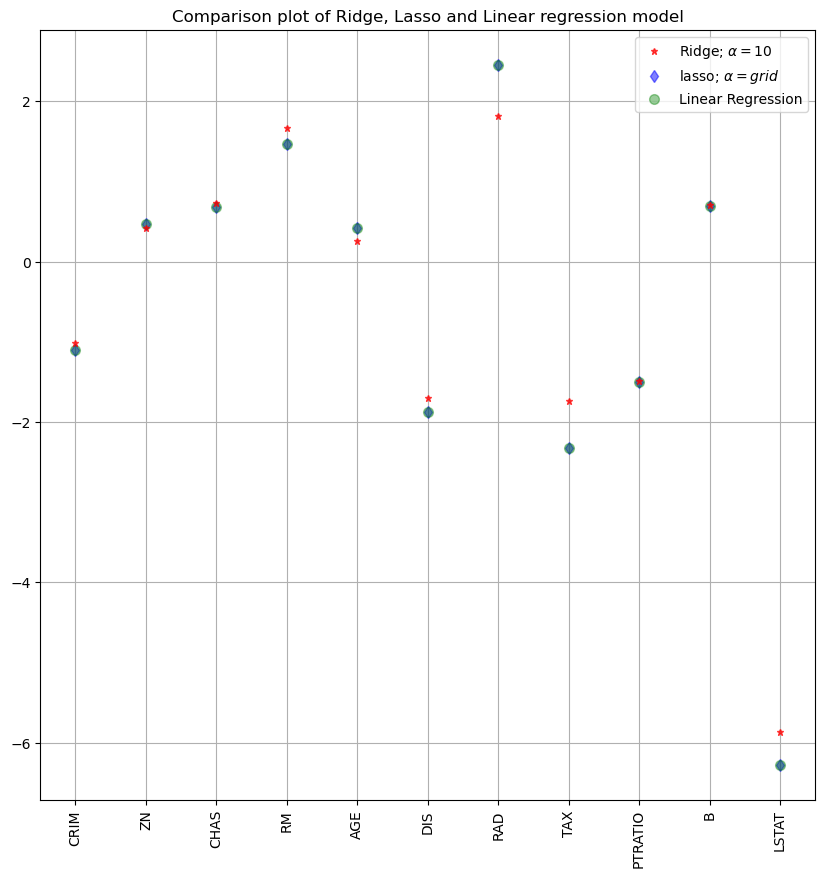

In [11]:
#plot size
plt.figure(figsize = (10, 10))

#add plot for ridge regression
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#addd plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.grid()
plt.show()

## Conclusion 
We have seen an implementation of ridge and lasso regression models and the theoretical and mathematical concepts behind these techniques. Some of the key takeaways from this tutorial include:

- The cost function for both ridge and lasso regression are similar. However, ridge regression takes the square of the coefficients and lasso takes the magnitude.
- An alpha value of zero in either ridge or lasso model will have results similar to the regression model.
- The larger the alpha value, the more aggressive the penalization.

In [ ]:
# Question = Can we talk about the model(s) we will be using for the walmart dataset?

Link to elastic net paper for those interested
https://hastie.su.domains/Papers/B67.2%20(2005)%20301-320%20Zou%20&%20Hastie.pdf